In [1]:
%autosave 0
from IPython.core.display import display, HTML
display(HTML("<style>.container { width:100% !important; }</style>"))

Autosave disabled


# Finding all Reachable Vertices

Assume we have a directed graph given as a binary relation $R$.  Forthermore, we have two 
nodes <tt>start</tt> and <tt>goal</tt>.  Our task is to find a path $P$ in the graph given by
$R$ that starts in the node <tt>start</tt> and ends in the  <tt>goal</tt>.  The function <tt>reachable</tt> below computes the shortest path $P$ that connects <tt>start</tt> and <tt>goal</tt>.

In [2]:
def reachable(start, goal, R):
    P = { (start,) }
    while True:
        oldP  = P
        P     = P.union(path_product(P, R))
        Found = { T for T in P if T[-1] == goal }
        if Found != set({}):
            return Found.pop()
        if P == oldP:
            return

The function $\texttt{path_product}(P, Q)$ takes two sets of paths $P$ and $Q$ and tries to build new paths by joining paths from $P$ and $Q$.

In [3]:
def path_product(P, R):
    return set(T1 + (T2[-1],) for T1 in P for T2 in R 
                              if T1[-1] == T2[0] and not T2[-1] in T1)

In [4]:
R = { (1,2), (2,3), (1,3), (2,4), (4,5), (3,6), (6,1) }

In [5]:
import graphviz as gv

def dot_graph(R):
    """This function takes binary relation R as inputs and shows this relation as
       a graph using the module graphviz.
    """
    dot = gv.Digraph()
    Nodes = { p[0] for p in R }.union({ p[1] for p in R })
    for n in Nodes:
        dot.node(str(n))
    for (x, y) in R:
        dot.edge(str(x), str(y))
    return dot

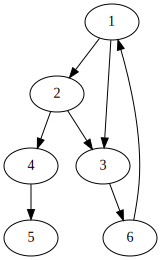

In [6]:
dot_graph(R)

In [7]:
reachable(2, 1, R)

(2, 3, 6, 1)